In [5]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
df = pd.read_csv('zillow_data copy.txt')

In [2]:
Chicago_df = df.loc[df.City=="Chicago"]

In [40]:
# Getting times as timeseries objects as the index and zipcodes as the columns; changing values to floats
Chicago = Chicago_df.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank'], axis=1)

Chicago.set_index('RegionName', inplace=True)
Chicago = Chicago.T
Chicago.index = pd.to_datetime(Chicago.index)
Chicago = Chicago.astype(float)
Chicago= Chicago.drop([60611], axis=1)

In [43]:
# making a date column for Linear Regression since it doesn't seem to like it as the index
Chicago['date'] = Chicago.index

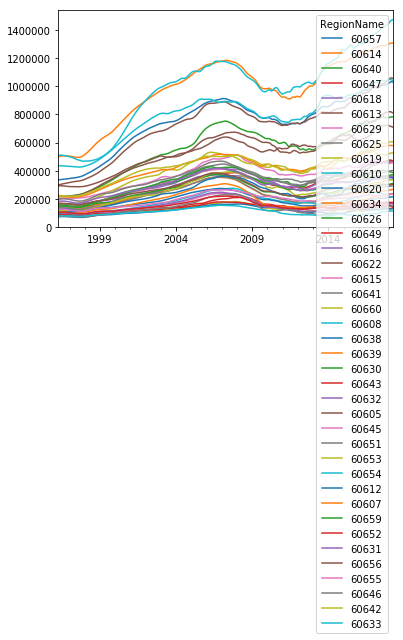

In [44]:
Chicago.iloc[:,:-1].plot()

# Test of stationarity with no transformations and baseline model

In [45]:
# some code from the lecture to look at stationarity

from statsmodels.tsa.stattools import adfuller, acf, pacf

def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.figure(figsize=(10,6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

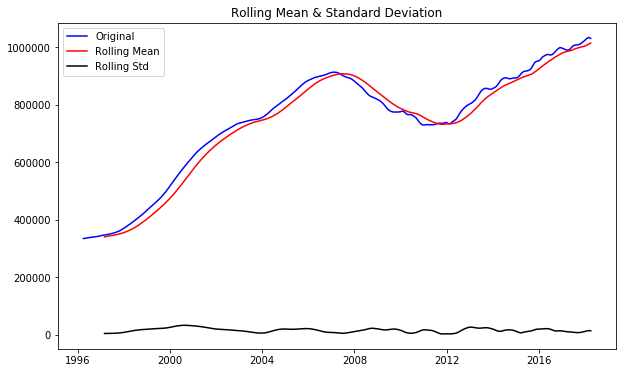

Results of Dickey-Fuller Test:
Test Statistic                  -2.298046
p-value                          0.172599
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [46]:
test_stationarity(Chicago[60657])
# Not stationary

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
X = Chicago.date.astype("int64").values.reshape(-1, 1)
y = Chicago[60657].values.reshape(-1, 1)

LR = LinearRegression()
baseline = LR.fit(X,y)
y_hat = LR.predict(X)
LR.coef_
LR.intercept_

array([-208840.60018117])

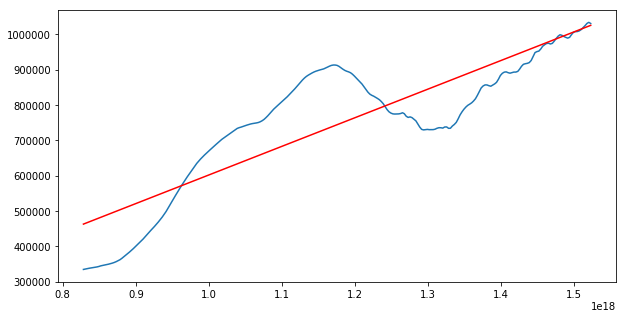

In [49]:
%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(X, y)
plt.plot(X, y_hat, color='red')
plt.show()

In [50]:
from sklearn.metrics import r2_score, mean_squared_error
print("r2:", r2_score(y, y_hat))
print("RMSE:", np.sqrt(mean_squared_error(y, y_hat)))

r2: 0.7330804291810987
RMSE: 98400.12258458108


# Difference Model

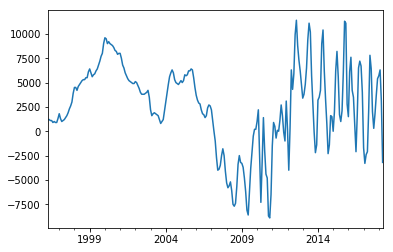

In [53]:
Chicago[60657].diff().plot()

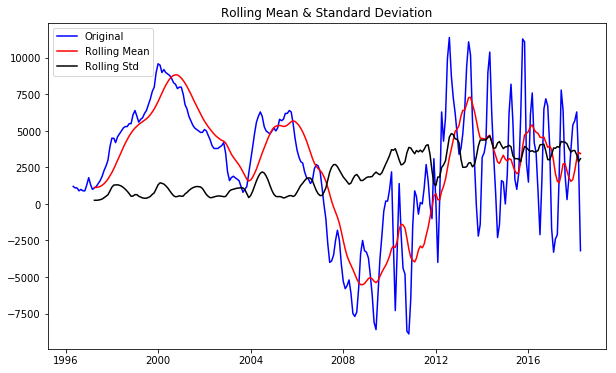

Results of Dickey-Fuller Test:
Test Statistic                  -1.942973
p-value                          0.312123
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [82]:
test_stationarity(Chicago[60657].diff().dropna())
# not stationary

In [83]:
X = Chicago.date[1:].astype("int64").values.reshape(-1, 1)
y = Chicago[60657].diff().dropna().values.reshape(-1, 1)

LR = LinearRegression()
baseline = LR.fit(X,y)
y_hat = LR.predict(X)
LR.coef_
LR.intercept_

array([7399.9951222])

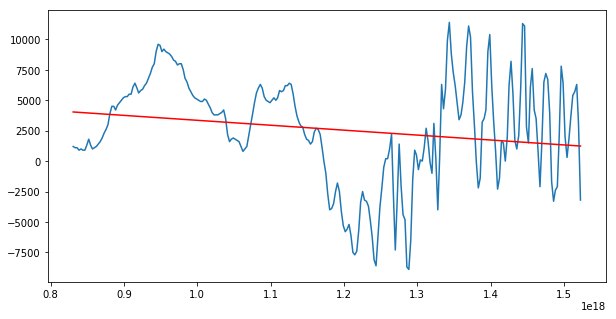

In [84]:
%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(X, y)
plt.plot(X, y_hat, color='red')
plt.show()

In [57]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
print("r2:", r2_score(y, y_hat))
print("RMSE:", np.sqrt(mean_squared_error(y, y_hat)))

r2: 0.03573170548236926
RMSE: 4213.230010554838


# Model of moving average

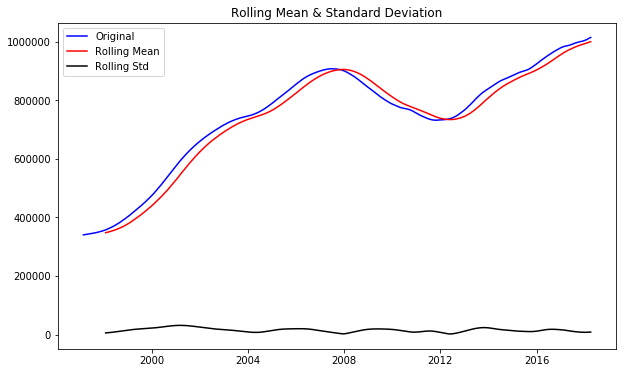

Results of Dickey-Fuller Test:
Test Statistic                  -1.803890
p-value                          0.378532
#Lags Used                      16.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [58]:
test_stationarity(Chicago[60657].rolling(window=12).mean().dropna())

In [69]:
X = Chicago.date[11:].astype("int64").values.reshape(-1, 1)
y = Chicago[60657].rolling(window=12).mean().dropna().values.reshape(-1, 1)

LR = LinearRegression()
baseline = LR.fit(X,y)
y_hat = LR.predict(X)
LR.coef_
LR.intercept_


array([-185385.89172016])

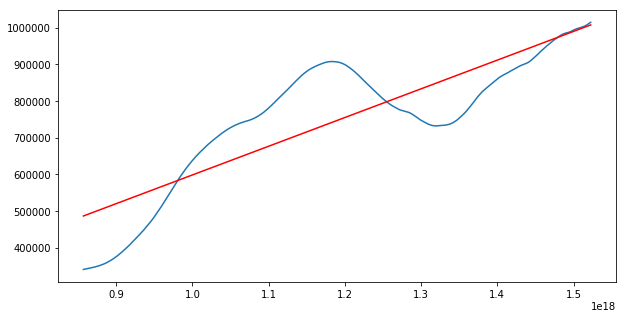

In [70]:
%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(X, y)
plt.plot(X, y_hat, color='red')
plt.show()

In [71]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
print("r2:", r2_score(y, y_hat))
print("RMSE:", np.sqrt(mean_squared_error(y, y_hat)))

r2: 0.7058085690637306
RMSE: 97522.30279559939


# Log transformation 

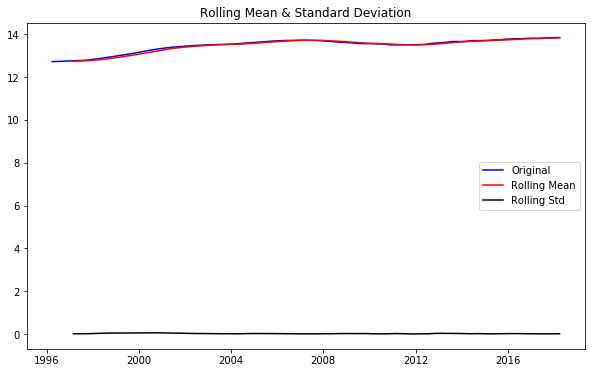

Results of Dickey-Fuller Test:
Test Statistic                  -3.287100
p-value                          0.015465
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [108]:
test_stationarity(np.log(Chicago[60657]))
# This one is stationary

In [109]:
X = Chicago.date.astype("int64").values.reshape(-1, 1)
y = np.log(Chicago[60657]).values.reshape(-1, 1)

LR = LinearRegression()
baseline = LR.fit(X,y)
y_hat = LR.predict(X)
LR.coef_
LR.intercept_



array([11.98345602])

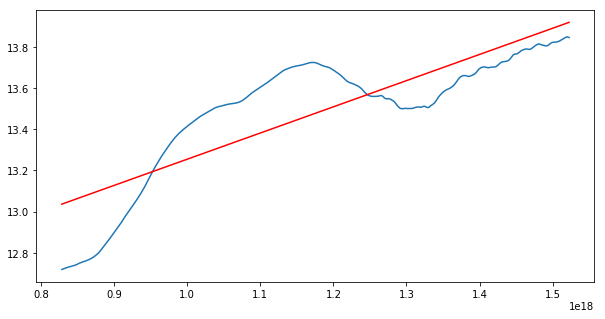

In [110]:
plt.figure(figsize=(10,5))
plt.plot(X, y)
plt.plot(X, y_hat, color='red')
plt.show()

In [107]:
from sklearn.metrics import r2_score, mean_squared_error
print("r2:", r2_score(y, y_hat))
print("RMSE:", np.sqrt(mean_squared_error(y, y_hat)))

r2: 0.6861817187603696
RMSE: 0.17297296411173937
